### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [2]:
df2=df.sort_values('total_litres_of_pure_alcohol', ascending=False).head(10)
df2["country"]

15                Belarus
98              Lithuania
3                 Andorra
68                Grenada
61                 France
45         Czech Republic
141    Russian Federation
99             Luxembourg
155              Slovakia
81                Ireland
Name: country, dtype: object

In [3]:
df3=df[['beer_servings','spirit_servings','wine_servings']].mean()
df3

beer_servings      106.160622
spirit_servings     80.994819
wine_servings       49.450777
dtype: float64

In [4]:
df['alcohol_index'] = (df['beer_servings'] + df['spirit_servings'] + df['wine_servings'])/3
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,alcohol_index
0,Afghanistan,0,0,0,0.0,0.000000
1,Albania,89,132,54,4.9,91.666667
2,Algeria,25,0,14,0.7,13.000000
3,Andorra,245,138,312,12.4,231.666667
4,Angola,217,57,45,5.9,106.333333
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,145.333333
189,Vietnam,111,2,1,2.0,38.000000
190,Yemen,6,0,0,0.1,2.000000
191,Zambia,32,19,4,2.5,18.333333


In [5]:
df4=df.sort_values('alcohol_index', ascending=False).head(1)["country"] #df4=df.country[df[alcohol_index].idxmax()]
df4

3    Andorra
Name: country, dtype: object

In [6]:
df5=df[df['beer_servings']>100]
df5

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,alcohol_index
3,Andorra,245,138,312,12.4,231.666667
4,Angola,217,57,45,5.9,106.333333
5,Antigua & Barbuda,102,128,45,4.9,91.666667
6,Argentina,193,25,221,8.3,146.333333
8,Australia,261,72,212,10.4,181.666667
...,...,...,...,...,...,...
182,United Kingdom,219,126,195,10.4,180.000000
184,USA,249,158,84,8.7,163.666667
185,Uruguay,115,35,220,6.6,123.333333
188,Venezuela,333,100,3,7.7,145.333333


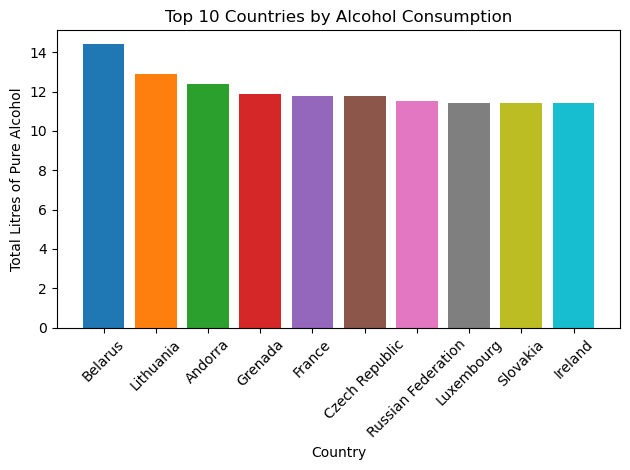

In [ ]:
plt.bar(df2["country"], df2["total_litres_of_pure_alcohol"], color=mcolors.TABLEAU_COLORS.values())
plt.title("Top 10 Countries by Alcohol Consumption")
plt.xlabel("Country")
plt.ylabel("Total Litres of Pure Alcohol")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

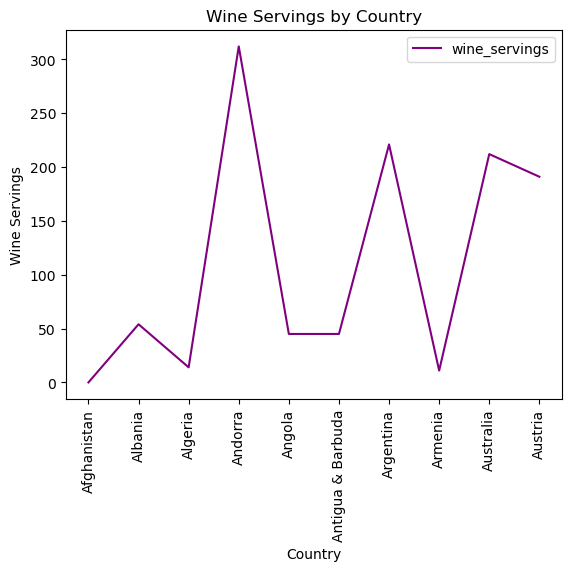

In [8]:
plt.figure(figsize=(15, 6))  # Aumenta la dimensione della figura
df.sort_values('country').head(10).plot(x='country', y='wine_servings', kind='line', color='purple')
plt.title("Wine Servings by Country")
plt.xticks(ticks=range(10), labels=df.sort_values('country').head(10)['country'], rotation=90)  # Mostra più nomi di paesi
plt.xlabel("Country")
plt.ylabel("Wine Servings")
plt.show()

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [1]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
dataf = dataset['train'].to_pandas()

dataf['job_posted_date'] = pd.to_datetime(dataf['job_posted_date'])

In [15]:
dataf

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd..."
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':..."
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ..."


In [ ]:
# Raggruppa per paese e calcola la media di salary_year_avg
country_salary_avg = dataf.groupby('job_country')['salary_year_avg'].mean().reset_index()
# Rinomina le colonne per chiarezza
#Controllo per vedere che funziona:
#dataf = dataf.dropna(subset=['salary_year_avg'])
#dataf[dataf['job_country'] == "Algeria"]['salary_year_avg'].mean()
country_salary_avg

,job_country,salary_year_avg
0,Albania,79472.500000
1,Algeria,44550.000000
2,Argentina,105212.343750
3,Armenia,78757.000000
4,Australia,118987.574324
...,...,...
103,Uruguay,69333.333333
104,Uzbekistan,30750.000000
105,Vietnam,90927.236364
106,Zambia,90670.000000


In [ ]:
job_count = dataf['job_country'].value_counts().reset_index()
job_count.columns = ['job_country', 'job_count']
job_count

,job_country,job_count
0,United States,15766
1,Sudan,1623
2,India,582
3,Canada,463
4,United Kingdom,287
...,...,...
103,Cambodia,1
104,Belarus,1
105,Zambia,1
106,Senegal,1


In [18]:
salary_range = dataf.groupby('job_country')['salary_year_avg'].agg(lambda x: f"{x.min()}-{x.max()}").reset_index()
salary_range.columns = ['job_country', 'salary_range']
salary_range

,job_country,salary_range
0,Albania,43200.0-157500.0
1,Algeria,44100.0-45000.0
2,Argentina,45000.0-222000.0
3,Armenia,45000.0-128682.0
4,Australia,20000.0-257500.0
...,...,...
103,Uruguay,50000.0-100500.0
104,Uzbekistan,30750.0-30750.0
105,Vietnam,28000.0-200000.0
106,Zambia,90670.0-90670.0


                                               job_title  average_salary
4982   Geographic Information Systems Analyst - GIS A...        585000.0
9865               Staff Data Scientist/Quant Researcher        550000.0
5220                Hybrid - Data Engineer - Up to $600k        525000.0
9807           Staff Data Scientist - Business Analytics        525000.0
10211                         VP Data Science & Research        463500.0
3383                Data Scientist (L5) - Member Product        450000.0
2333                          Data Engineer (L4) - Games        450000.0
447      Applied Data Science or Machine Learning Leader        425000.0
8069               Senior Data Engineer, Security Master        425000.0
7276                                 SVP, Data Analytics        425000.0


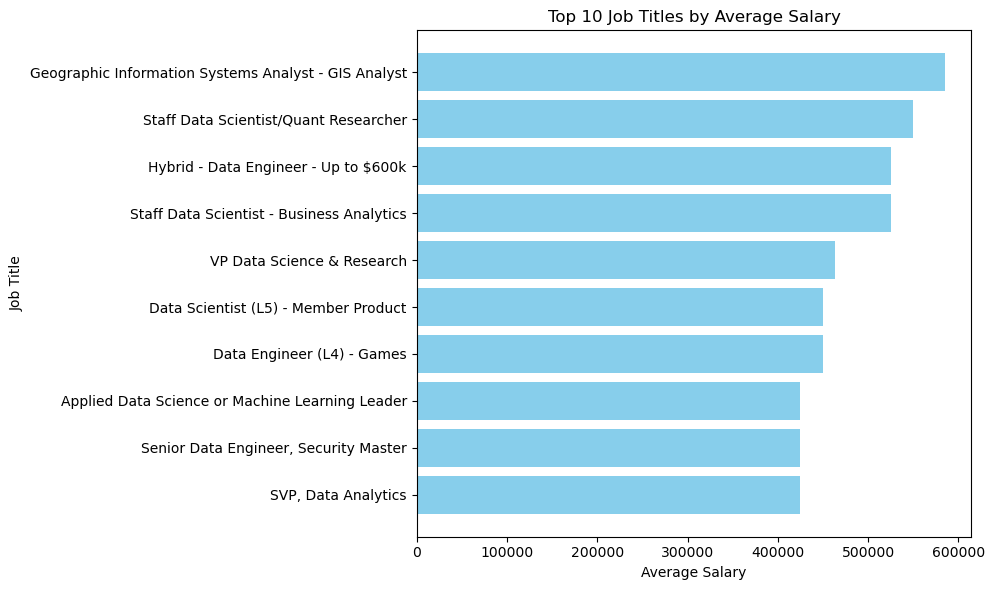

In [30]:
# Calcola lo stipendio medio per ogni job_title
job_title_salary_avg = dataf.groupby('job_title')['salary_year_avg'].mean().reset_index()

# Rinomina le colonne per chiarezza
job_title_salary_avg.columns = ['job_title', 'average_salary']

# Mostra il risultato
print(job_title_salary_avg.sort_values(by='average_salary', ascending=False).head(10))


# Ordina i dati dallo stipendio medio più alto al più basso
job_title_salary_avg_sorted = job_title_salary_avg.sort_values(by='average_salary', ascending=False).head(10)

# Crea un grafico a barre orizzontali
plt.figure(figsize=(10, 6))
plt.barh(job_title_salary_avg_sorted['job_title'], job_title_salary_avg_sorted['average_salary'], color='skyblue')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles by Average Salary')
plt.gca().invert_yaxis()  # Inverti l'asse y per mostrare il valore più alto in cima
plt.tight_layout()
plt.show()